# The Gaussian similarity function

## Perform standard imports 

In [1]:
#=
import Pkg; 
Pkg.add("Clustering")
=#

In [2]:
using Distributions, Plots, LinearAlgebra, Clustering, Random

## Generate the data

In [3]:
function données(x, sigma)
    #=
    
    x : numéro de la figure
    sigma : réel >=0, écart-type du bruit
    
    Cette fonction génère des données bruitées. La sortie est une liste de coordonnées.
    
    =#
    global points00
    
    if x==20 
        
        # 2 cercles bruités
        
        t1 = LinRange(0, 2*π, 20)
        x1 = 10*cos.(t1)
        y1 = 10*sin.(t1)

        t2 = LinRange(0, 2*π, 12)
        x2 = 10*cos.(t2)/3
        y2 = 10*sin.(t2)/3

        points1=[[x1[k],y1[k]] for k in 1:length(x1)]
        points2=[[x2[k],y2[k]] for k in 1:length(x2)]

        points0=[points1,points2]
        
    elseif x==21
        
        # 2 cercles avec un grand nombre de points 
        
        t1=LinRange(0,2*pi,50)
        x1=10*cos.(t1)
        y1=10*sin.(t1)
        
        t2=LinRange(0,2*pi,30)
        x2=5*cos.(t2)
        y2=5*sin.(t2)
        
        
        points1=[[x1[k],y1[k]] for k in 1:length(x1)]
        points2=[[x2[k],y2[k]] for k in 1:length(x2)]
        
        points0=[points1,points2]
    
    elseif x==22
        
        # Deux cercles de 50 points chacun rapprochés
        
        t=LinRange(0,2*pi,50)
        
        points1=[[10*cos(t),10*sin(t)] for t in t]
        points2=[[8*cos(t),8*sin(t)] for t in t]
        
        points0=[points1,points2]

        
    elseif x==23
        
        # 2 rectangles de tailles différentes générés au hasard
        
        x1 = [2*((rand()-1)-0.6) for i in 1:40]
        y1 = [2*(3*(rand()-0.5)) for i in 1:40]
        
        x2 = [2*(2*(rand())+0.3) for i in 1:80]
        y2 = [2*(0.5*(rand()-0.5)) for i in 1:80]

        
        points1=[[x1[k],y1[k]] for k in 1:length(x1)]
        points2=[[x2[k],y2[k]] for k in 1:length(x2)]
        
        points0=[points1,points2]
        
    elseif x==24
        
        # 2 cercles rapprochés avec énormément de points
        
        t1=LinRange(0,2*pi,150)
        x1=10*cos.(t1)
        y1=10*sin.(t1)
        
        t2=LinRange(0,2*pi,150)
        x2=10*cos.(t2)/1.3
        y2=10*sin.(t2)/1.3
        
        
        points1=[[x1[k],y1[k]] for k in 1:length(x1)]
        points2=[[x2[k],y2[k]] for k in 1:length(x2)]
        
        points0=[points1,points2]
        

        
    elseif x==25
        
        # Un cercle et un carré concentriques
        
        points1=[[10*(rand()-0.5),10*(rand()-0.5)] for _ in 1:150]
        points2=[[10*cos(t),10*sin(t)] for t in LinRange(0,2*pi,50)]
        
        points0=[points1,points2]
        
        
    elseif x==26
        
        # Deux cercles proches avec peu de points
        
        points1=[[(30/pi)*cos(t),(30/pi)*sin(t)] for t in [((2*pi)/60)*i for i in 1:60]]
        points2=[[(26/pi)*cos(t),(26/pi)*sin(t)] for t in [((2*pi)/52)*i for i in 1:52]]
        
        points0=[points1,points2]
        
        
    elseif x==27
        
        # Un carrée très bruité, un carré peu bruité
        
        x1=repeat([x for x in LinRange(-5,0,5)], outer=[5])
        y1=[]
        for i in 0:4
            y01 = [i for _ in 1:5]
            y1 = vcat(y1, y01)
        end

        x2=repeat([x for x in LinRange(2,4,5)], outer=[5])    
        y2=[]
        for i in 0:4
            y02 = [i*(2/5)+1 for _ in 1:5]
            y2 =vcat(y2, y02)
        end
        points1=[[x1[i],y1[i]] for i in 1:5*5]
        points2=[[x2[i],y2[i]] for i in 1:5*5]

        points0=[points1,points2]
        
    elseif x==30
        
        # 3 traits
        
        t1=LinRange(-1,1,40)
        
        t2=LinRange(-1,1,40)

        t3=LinRange(-1,1,40)

        
        points1=[[t1[k],1] for k in 1:length(t1)]
        points2=[[t2[k],0] for k in 1:length(t2)]
        points3=[[t3[k],-1] for k in 1:length(t3)]
        
        points0=[points1,points2,points3]
        

        
    elseif x==31
        
        # 3 cercles concentriques
        
        points1=[[3*cos(t),3*sin(t)] for t in LinRange(0,2*pi,30)]
        points2=[[6*cos(t),6*sin(t)] for t in LinRange(0,2*pi,40)]
        points3=[[9*cos(t),9*sin(t)] for t in LinRange(0,2*pi,50)]
        
        points0=[points1,points2,points3]
        

        
        
    elseif x==32
        
        # Trait, carré, cercle
        
        points1=[[-4,12*(rand()-0.5)] for _ in 1:30]
        points2=[[5*(rand()-0.5)+3,5*(rand()-0.5)] for _ in 1:70]
        points3=[[10*cos(t),10*sin(t)] for t in LinRange(0,2*pi,50)]
        
        points0=[points1,points2,points3]
        
    elseif x==33
        
        # Deux carrés, un trait
        
        x1= repeat([x for x in LinRange(-4,-2,5)], outer=[5])
        y1=[]
        for i in 1:5
            y01 = [i*(2/5) for _ in 1:5]
            y1 = vcat(y1, y01)    
        end
        x2=repeat([x for x in LinRange(2,4,5)], outer=[5])
        y2=[]
        for i in 1:5
            y02 = [i*(2/5)+1 for _ in 1:5]
            y2 = vcat(y2, y02)
        end
        
        x3=[cos(t) for t in LinRange(0,1.5*pi,30)]
        y3=[y for y in LinRange(-1,3,25)]  
        
        points1=[[x1[i],y1[i]] for i in 1:5*5]
        points2=[[x2[i],y2[i]] for i in 1:5*5]
        points3=[[x3[i],y3[i]] for i in 1:5*5]
        
        points0=[points1,points2,points3]

    elseif x==40
        
        # Quatre pavés
        
        points1=[[rand()-5,rand()+5] for _ in 1:25]
        points2=[[rand()+5,rand()+5] for _ in 1:25]
        points3=[[rand()-5,rand()-5] for _ in 1:25]
        points4=[[rand()+5,rand()-5] for _ in 1:25]
        
        points0=[points1,points2,points3,points4]
        
    
    elseif x==41
    
        # Quatre lettres
        
        x1=vcat([x for x in LinRange(-10,-8,10)], [-9 for _ in 1:20])
        y1=vcat([10 for _ in LinRange(-10,-8,10)], [y for y in LinRange(10,6,20)])
        
        x2=vcat([-6 for _ in 1:20], repeat([x for x in LinRange(-6,-4,10)], outer=[3]))
        y2=vcat([y for y in LinRange(10,6,20)], [10 for _ in 1:10], [8 for _ in 1:10], [6 for _ in 1:10])
        
        x3=[-1+cos(t) for t in LinRange(0,3*pi,25)]
        y3=[y for y in LinRange(10,6,25)]
        
        
        x4=vcat([x for x in LinRange(2,4,10)], [3 for _ in 1:20])
        y4=vcat([10 for _ in LinRange(-10,-8,10)], [y for y in LinRange(10,6,20)])
        
        points1=[[x1[t],y1[t]] for t in 1:length(x1)]
        points2=[[x2[t],y2[t]] for t in 1:length(x2)]
        points3=[[x3[t],y3[t]] for t in 1:length(x3)]
        points4=[[x4[t],y4[t]] for t in 1:length(x4)]
        
        points0=[points1,points2,points3,points4]
    
        
    elseif x==80
        
        # Huit pavés
        
        points1=[[rand()-3,rand()+3] for _ in 1:25]
        points2=[[rand(),rand()+3] for _ in 1:25]
        points3=[[rand()+3,rand()+3] for _ in 1:25]
        points4=[[rand()-3,rand()] for _ in 1:25]
        points5=[[rand(),rand()] for _ in 1:25]
        points6=[[rand()+3,rand()] for _ in 1:25]
        points7=[[rand()-3,rand()-3] for _ in 1:25]
        points8=[[rand(),rand()-3] for _ in 1:25]
        
        points0=[points1,points2,points3,points4,points5,points6,points7,points8]
        
         
    elseif x==81
        
        # Huit classes
        
        x1=vcat([x for x in LinRange(-10,-8,10)], [-9 for _ in 1:10])
        y1=vcat([10 for _ in LinRange(-10,-8,10)], [y for y in LinRange(10,6,10)])
        
        x2=vcat([-6 for _ in 1:10], repeat([x for x in LinRange(-6,-4,10)], outer=[3]))
        y2=vcat([y for y in LinRange(10,6,10)], [10 for _ in 1:10], [8 for _ in 1:10], [6 for _ in 1:10])

        x3=[-1+cos(t) for t in LinRange(0,3*pi,20)]
        y3=[y for y in LinRange(10,6,20)]


        x4=vcat([x for x in LinRange(2,4,10)], [3 for _ in 1:10])
        y4=vcat([10 for _ in LinRange(-10,-8,10)], [y for y in LinRange(10,6,10)])

        x5=repeat([x for x in LinRange(-10,-8,4)], outer=[4])
        y05=[[y0 for _ in 1:4] for y0 in LinRange(-2,2,4)]
        y5=[]
        for k in y05
            append!(y5, k)
        end
            
        x6=[4*cos(t) for t in LinRange(0,2*pi,30)]
        y6=[4*sin(t) for t in LinRange(0,2*pi,30)]
        
        x7=[2*cos(t) for t in LinRange(0,2*pi,20)]
        y7=[2*sin(t) for t in LinRange(0,2*pi,20)]
        
        x8=vcat([-12 for _ in 1:40], [x for x in LinRange(-12,6,40)], [6 for _ in 1:40], [x for x in LinRange(6,-12,40)])
        y8=vcat([y for y in LinRange(-6,12,40)], [12 for _ in 1:40], [y for y in LinRange(12,-6,40)], [-6 for _ in 1:40])
        
        
        
        points1=[[x1[t],y1[t]] for t in 1:length(x1)]
        points2=[[x2[t],y2[t]] for t in 1:length(x2)]
        points3=[[x3[t],y3[t]] for t in 1:length(x3)]
        points4=[[x4[t],y4[t]] for t in 1:length(x4)]
        points5=[[x5[t],y5[t]] for t in 1:length(x5)]
        points6=[[x6[t],y6[t]] for t in 1:length(x6)]
        points7=[[x7[t],y7[t]] for t in 1:length(x7)]
        points8=[[x8[t],y8[t]] for t in 1:length(x8)]
        
        points0=[points1,points2,points3,points4,points5,points6,points7,points8]
        
        
    elseif x==82
        
        # Huit classes de différente densité
        
        x1=vcat([x for x in LinRange(-10,-8,10)], [-9 for _ in 1:10])
        y1=vcat([10 for _ in LinRange(-10,-8,10)], [y for y in LinRange(10,6,10)])

        x2=vcat([-6 for _ in 1:10], repeat([x for x in LinRange(-6,-4,10)], outer=[3]))
        y2=vcat([y for y in LinRange(10,6,10)], [10 for _ in 1:10], [8 for _ in 1:10], [6 for _ in 1:10])

        x3=[-1+cos(t) for t in LinRange(0,3*pi,20)]
        y3=[y for y in LinRange(10,6,20)]


        x4=vcat([x for x in LinRange(2,4,10)], [3 for _ in 1:10])
        y4=vcat([10 for _ in LinRange(-10,-8,10)], [y for y in LinRange(10,6,10)])

        x5=repeat([x for x in LinRange(-10,-8,4)], outer=[4])
        y05=[[y0 for _ in 1:4] for y0 in LinRange(-3,1,4)]

        y5=[]
        for k in y05
            append!(y5, k)
        end

        x6=[4*cos(t) for t in LinRange(0,2*pi,30)]
        y6=[4*sin(t) for t in LinRange(0,2*pi,30)]

        x7=[2*cos(t) for t in LinRange(0,2*pi,20)]
        y7=[2*sin(t) for t in LinRange(0,2*pi,20)]

        x8=[15*cos(t)-2 for t in LinRange(0,2*pi,35)]
        y8=[15*sin(t)+2 for t in LinRange(0,2*pi,35)]



        points1=[[x1[t],y1[t]] for t in 1:length(x1)]#20
        points2=[[x2[t],y2[t]] for t in 1:length(x2)]#40
        points3=[[x3[t],y3[t]] for t in 1:length(x3)]#20
        points4=[[x4[t],y4[t]] for t in 1:length(x4)]#20
        points5=[[x5[t],y5[t]] for t in 1:length(x5)]#16
        points6=[[x6[t],y6[t]] for t in 1:length(x6)]#30
        points7=[[x7[t],y7[t]] for t in 1:length(x7)]#20
        points8=[[x8[t],y8[t]] for t in 1:length(x8)]#35

        points0=[points1,points2,points3,points4,points5,points6,points7,points8]

        M=[0.1]*100+[0.9]*16+[0.1]*60+[0.7]*35  
        
    end
    
    for classe in points0
        for point in classe
            for i in 1:length(point)
                d = Normal(0, sigma)
                x = rand(d, 1)
                point[i]+= x[1] 
            end
        end
    end

    points00=[[tuple(a) for a in points0[k]] for k in 1:length(points0)]

    points=[]

    for k in points00
        append!(points, k)
    end

    return points
end

données (generic function with 1 method)

In [4]:
function données_classées(x,sigma)
    
    #=
    
    x : numéro de la figure
    sigma : écart-type du bruit
    
    Cette fonction génère des données bruitées et classées.
    La sortie est une liste de (sous-)listes correspondant chacune à un cluster.
    Elle est utilisée pour effectuer des tests de clustering (taux d'erreur).
    
    =#
    
    données(x,sigma)
    return points00
end

données_classées (generic function with 1 method)

In [5]:
function données_bl(x,M)
    
    #=
    x : numéro de la figure
    M : liste, de longueur égale au nombre de points, des écarts-type du bruit propres à chaque point.
    
    Cette fonction génère des données bruitées localement. La sortie est une liste de coordonnées.
    
    =#
    
    global points00
    
    points0=données_classées(x,0)

    points00=[[tuple([points0[k][i][1][j]+rand(Normal(0,M[i-length(points0[k])+Int(sum([length(points0[k0]) for k0 in 1:k]))]),1)[1] 
                for j in 1:length(points0[1][1][1])]) 
        for i in 1:length(points0[k])] 
    for k in 1:length(points0)]
    
    points=[]
    for k in points00
        append!(points, k)
    end
    return points
end 

données_bl (generic function with 1 method)

In [6]:
function données_classées_bl(x,M)
    
    #=
    x : numéro de la figure
    M : liste, de longueur égale au nombre de points, des écarts-type du bruit propres à chaque point.
    
    Cette fonction génère des données bruitées localement et classées.
    La sortie est une liste de (sous-listes) correspondant chacune à un cluster.
    Elle est utilisée pour effectuer des tests de clustering (taux d'erreur).
    
    =#
    
    données_bl(x,M)
    
    return points00
end

données_classées_bl (generic function with 1 method)

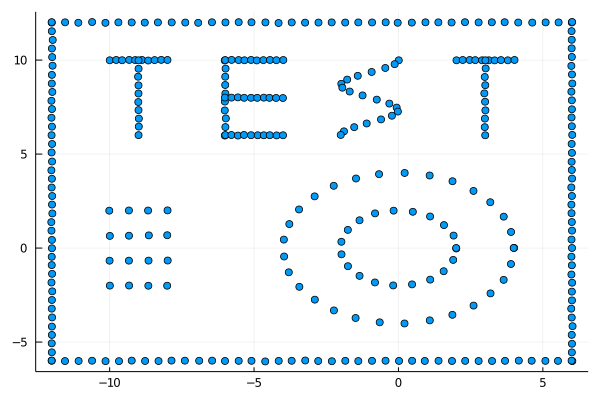

In [7]:
points = données(81, 0.01)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, legend=false)

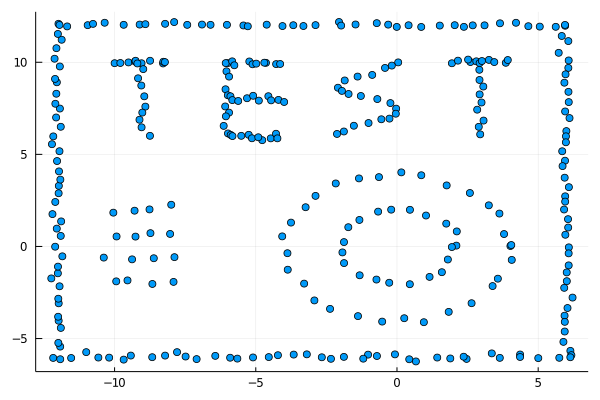

In [8]:
n = length(données(81, 0.01))
list_sigma = [0.1 for _ in 1:n]
points = données_bl(81, list_sigma)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, legend=false)

## Similarity graph

In [9]:
function Gaussian_Similary(x1, x2, sigma)
    dist = norm(x1 - x2)
    return exp(-dist^2/(2*sigma^2))
end

Gaussian_Similary (generic function with 1 method)

## The fully connected graph

In [10]:
function fully_connected_graph(data, sigma)
    n = length(data)
    S = zeros((n, n))
    for i in 1:n
        for j in 1:n
            if i!=j
                S[i,j] = Gaussian_Similary(data[i][1], data[j][1], sigma)
            end
        end
    end
    return S
end

fully_connected_graph (generic function with 1 method)

## Spectral Clustering

In [11]:
function Spectral_Clustering(data, k, sigma)
    
    n = length(points)
    W = fully_connected_graph(points, sigma) # Weighted matrix
    D = zeros((n, n)) # Degree matrix 
    for i in 1:n
        D[i,i] = sum(W[i, :])
    end

    L = D - W # Laplacien matrix 
    L_rw = inv(D)*L # the generalized eigenvectors of L => the eigenvectors of L_rw
    eig_vals, eig_vecs = eigvals(L_rw), eigvecs(L_rw) # Eigenvalue and its eigenvector
    
    sorted_eig_vals = sortperm(eig_vals)[1:k]
    U = eig_vecs[:,sorted_eig_vals] # the first k generalized eigenvectors as columns   
    
    Kmeans = kmeans(U', k) # Apply kmeans 
    labels = Kmeans.assignments
    return labels
end

Spectral_Clustering (generic function with 1 method)

# The p-value similarity function

In [12]:
function estimate_beta(pts, M) 
    n = length(pts)
    res = []
    distances = [[] for i in 1:n]
    for i in 1:n
        xi = pts[i][1]
        for j in 1:n
            xj = pts[j][1]
            append!(distances[i], norm(xi-xj))
        end
        distances[i] = sort(distances[i])[1:M]
        append!(res, mean(distances[i]))
    end
    return res
end

estimate_beta (generic function with 1 method)

In [13]:
function pvalue(i, j, beta)
    
    tau_ij = min(beta[i], beta[j])
    sigma_ij = sqrt(list_sigma[i]^2 + list_sigma[j]^2)
    
    b = norm((points[i][1] - points[j][1])/sigma_ij)
    a = tau_ij/sigma_ij
    w = 1-cdf(NoncentralChisq(1, a^2), b^2)
    return w
end

pvalue (generic function with 1 method)

In [14]:
function pvalue_graph(data, beta)
    n = length(data)
    S = zeros((n, n))
    for i in 1:n
        for j in 1:n
            if i!=j
                S[i,j] = pvalue(i,j,beta)
            end
        end
    end
    return S
end

pvalue_graph (generic function with 1 method)

In [15]:
function Spectral_Clustering_pvalue(data, k, M)
    
    beta = estimate_beta(data, M)
    W = pvalue_graph(data, beta)
    D = zeros((n, n)) # Degree matrix 
    for i in 1:n
        D[i,i] = sum(W[i, :])
    end
    
    L = D - W # Laplacien matrix 
    L_rw = inv(D)*L # the generalized eigenvectors of L => the eigenvectors of L_rw
    
    eig_vals, eig_vecs = eigvals(L_rw), eigvecs(L_rw) # Eigenvalue and its eigenvector

    sorted_eig_vals = sortperm(eig_vals)[1:k]
    U = eig_vecs[:,sorted_eig_vals] # the first k generalized eigenvectors as columns   

    Kmeans = kmeans(U', k) # Apply kmeans 
    labels = Kmeans.assignments
    
    return labels
end

Spectral_Clustering_pvalue (generic function with 1 method)

# Examples

## 2 Classes

### 2 cercles bruités

#### Gaussian similarity function 

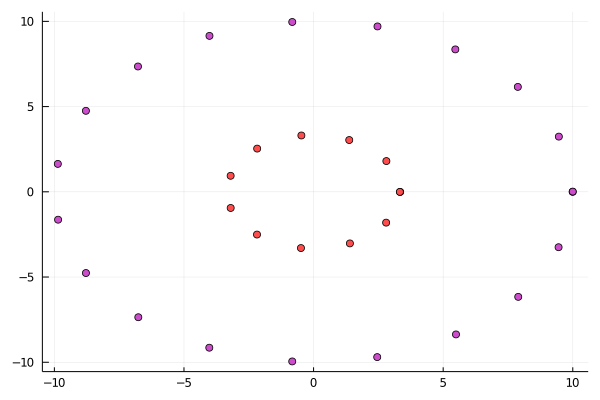

In [16]:
points = données(20, 0.01)
labels = Spectral_Clustering(points, 2, 0.1)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

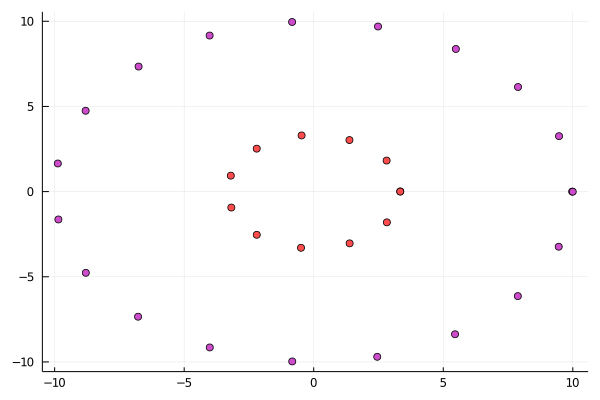

In [17]:
data = données(20, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(20, list_sigma)
labels = Spectral_Clustering_pvalue(points, 2, 6)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### 2 cercles avec un grand nombre de points

#### Gaussian Similarity function

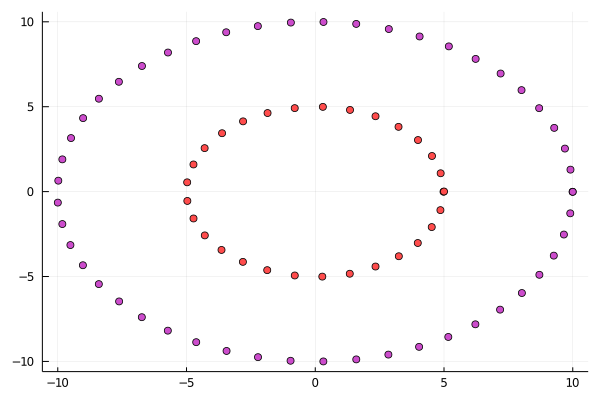

In [18]:
points = données(21, 0.01)
labels = Spectral_Clustering(points, 2, 0.1)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

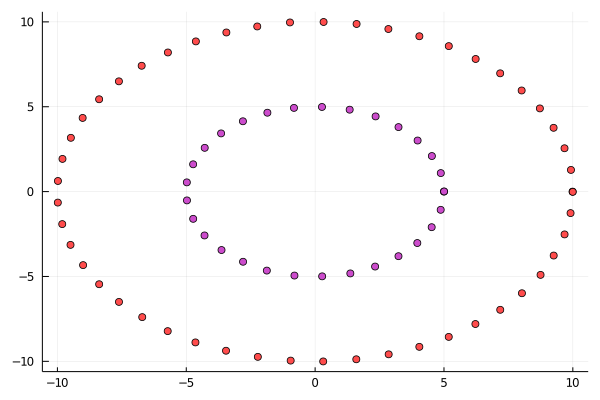

In [19]:
data = données(21, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(21, list_sigma)
labels = Spectral_Clustering_pvalue(points, 2, 6)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### Deux cercles de 50 points chacun rapprochés

#### Gaussian Similarity function

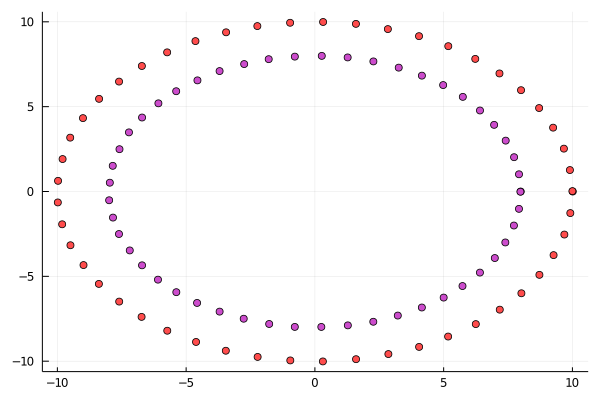

In [20]:
points = données(22, 0.01)
labels = Spectral_Clustering(points, 2, 0.1)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value Similarity function

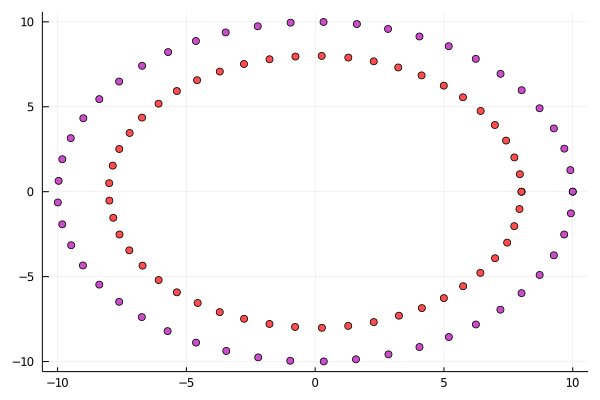

In [21]:
data = données(22, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(22, list_sigma)
labels = Spectral_Clustering_pvalue(points, 2, 7)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### 2 rectangles de tailles différentes générés au hasard

#### Gaussian Similarity function

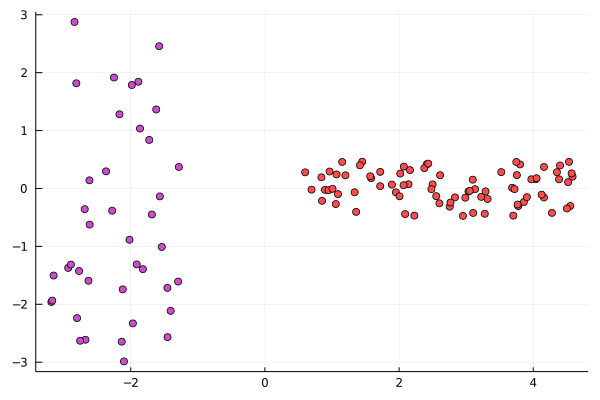

In [26]:
points = données(23, 0.01)
labels = Spectral_Clustering(points, 2, 0.2)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

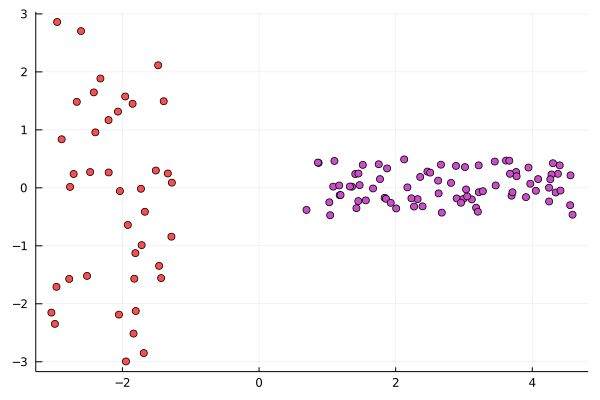

In [27]:
Random.seed!(8)
data = données(23, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(23, list_sigma)
labels = Spectral_Clustering_pvalue(points, 2, 15)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### 2 cercles rapprochés avec énormément de points

#### Gaussian Similarity function

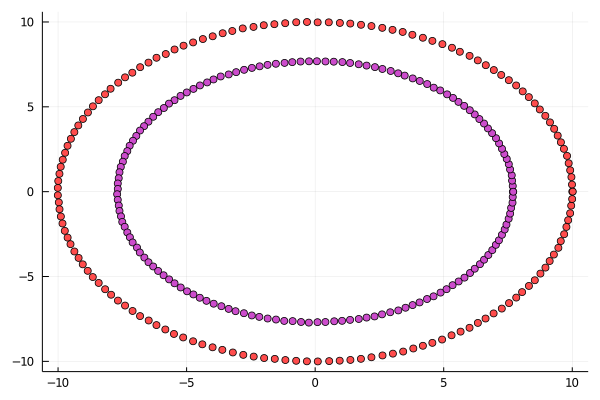

In [28]:
points = données(24, 0.01)
labels = Spectral_Clustering(points, 2, 0.1)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

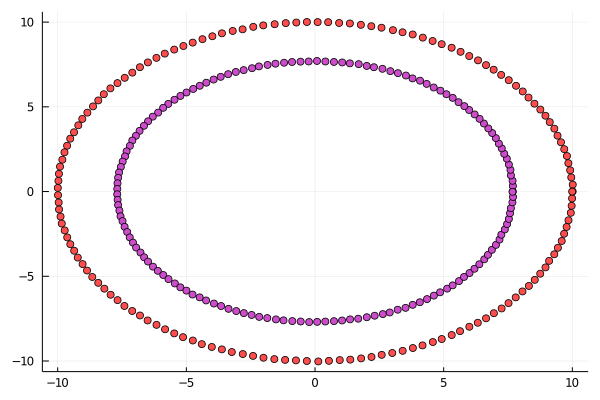

In [29]:
data = données(24, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(24, list_sigma)
labels = Spectral_Clustering_pvalue(points, 2, 5)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### Un cercle et un carré concentriques

#### Gaussian Similarity function

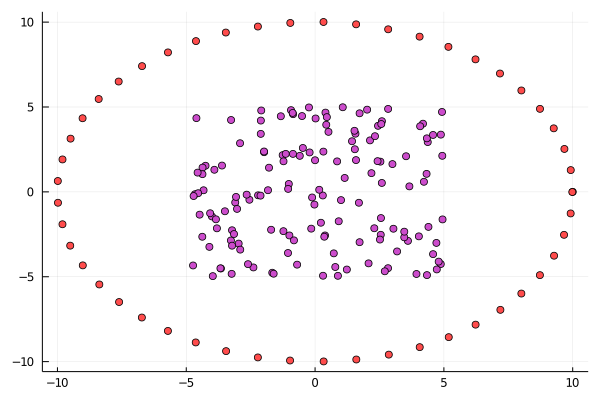

In [30]:
points = données(25, 0.01)
labels = Spectral_Clustering(points, 2, 0.2)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

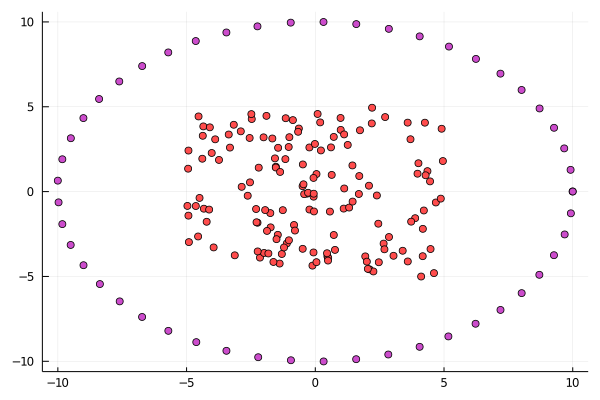

In [31]:
data = données(25, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(25, list_sigma)
labels = Spectral_Clustering_pvalue(points, 2, 16)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### Deux cercles proches avec peu de points

#### Gaussian Similarity function

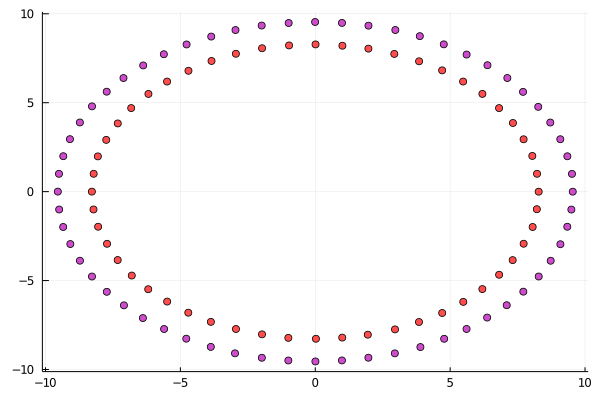

In [32]:
points = données(26, 0.01)
labels = Spectral_Clustering(points, 2, 0.2)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

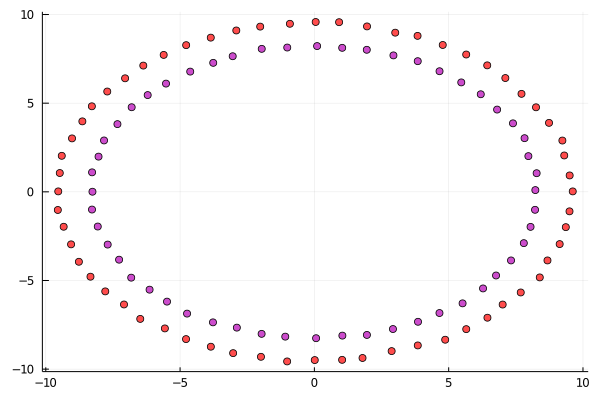

In [33]:
data = données(26, 0.01)
n = length(data)
list_sigma = [0.05 for _ in 1:n]
points = données_bl(26, list_sigma)
labels = Spectral_Clustering_pvalue(points, 2, 4)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### Un carrée très bruité, un carré peu bruité

#### Gaussian Similarity function

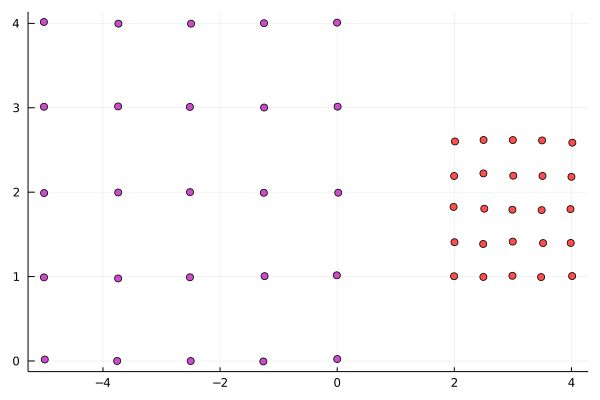

In [34]:
points = données(27, 0.01)
labels = Spectral_Clustering(points, 2, 0.2)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

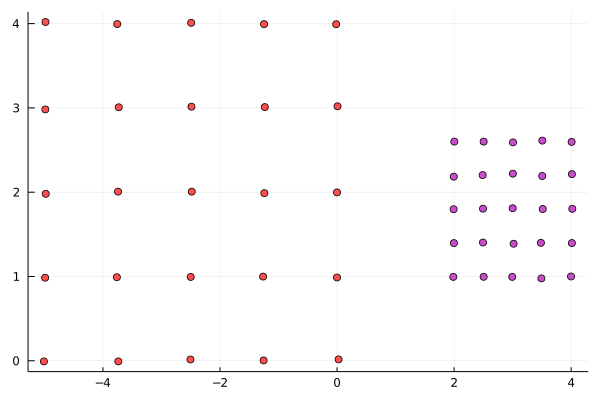

In [35]:
data = données(27, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(27, list_sigma)
labels = Spectral_Clustering_pvalue(points, 2, 8)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

## 3 Classes

### 3 traits

#### Gaussian Similarity function

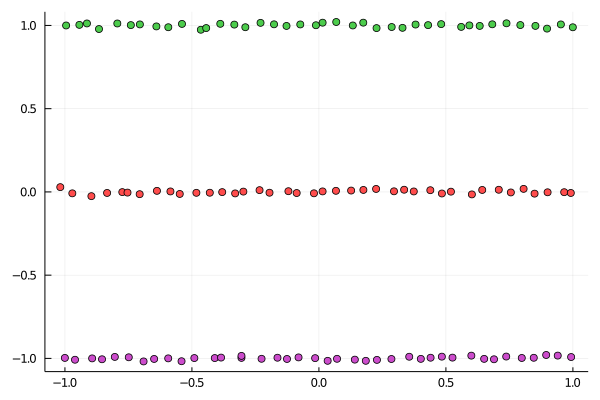

In [36]:
points = données(30, 0.01)
labels = Spectral_Clustering(points, 3, 0.2)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

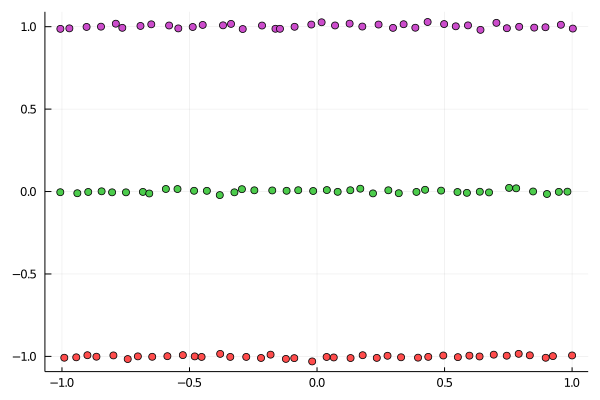

In [37]:
data = données(30, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(30, list_sigma)
labels = Spectral_Clustering_pvalue(points, 3, 3)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### 3 cercles concentriques

#### Gaussian Similarity function

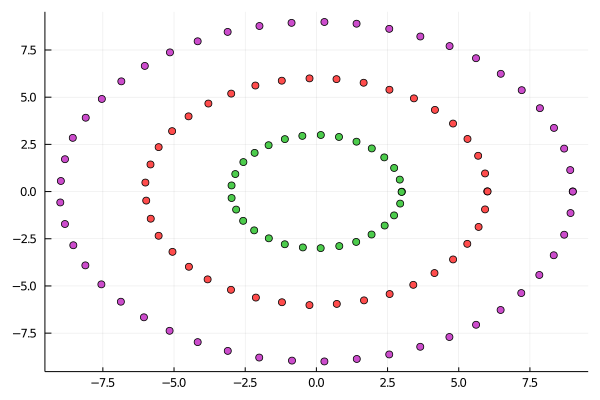

In [38]:
points = données(31, 0.01)
labels = Spectral_Clustering(points, 3, 0.2)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

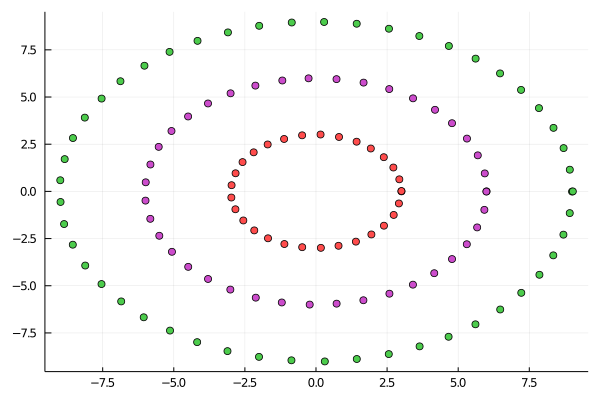

In [39]:
data = données(31, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(31, list_sigma)
labels = Spectral_Clustering_pvalue(points, 3, 6)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### Trait, carré, cercle

#### Gaussian Similarity function

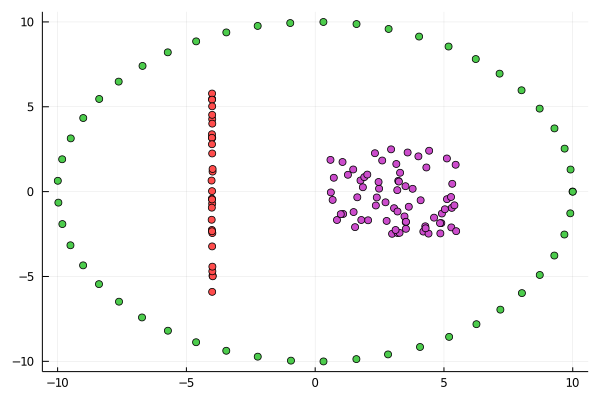

In [40]:
points = données(32, 0.01)
labels = Spectral_Clustering(points, 3, 0.3)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

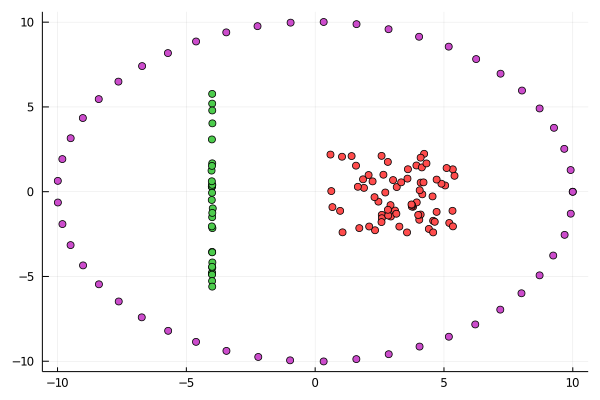

In [41]:
Random.seed!(4)
data = données(32, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(32, list_sigma)
labels = Spectral_Clustering_pvalue(points, 3, 16)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### Deux carrés, un trait

#### Gaussian Similarity function

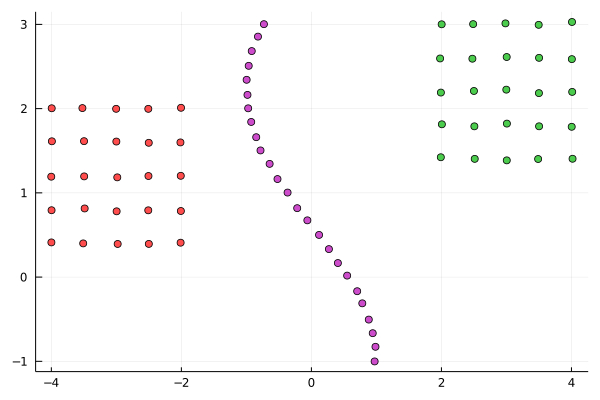

In [42]:
points = données(33, 0.01)
labels = Spectral_Clustering(points, 3, 0.2)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

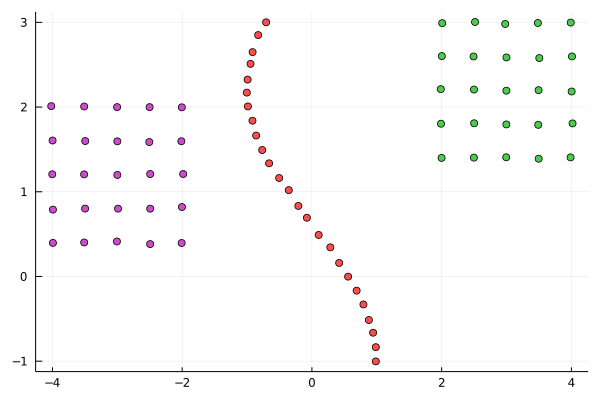

In [43]:
data = données(33, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(33, list_sigma)
labels = Spectral_Clustering_pvalue(points, 3, 4)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

## 4 Classes

### Quatre pavés

#### Gaussian Similarity function

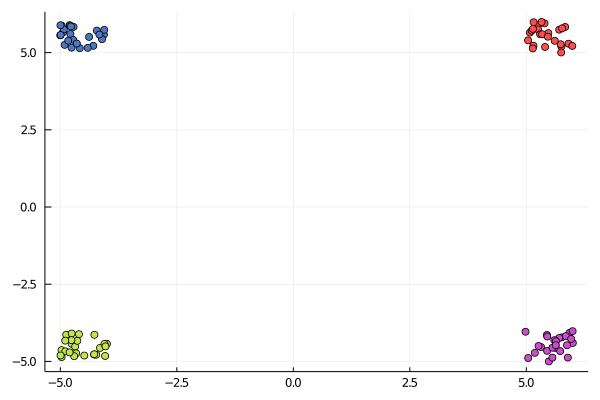

In [44]:
points = données(40, 0.01)
labels = Spectral_Clustering(points, 4, 0.2)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

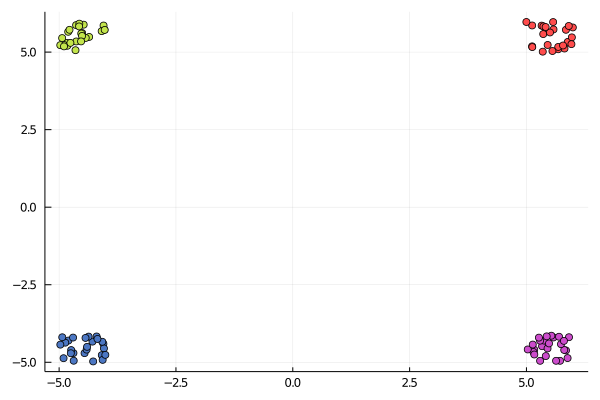

In [45]:
data = données(40, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(40, list_sigma)
labels = Spectral_Clustering_pvalue(points, 4, 6)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### Quatre lettres

#### Gaussian Similarity function

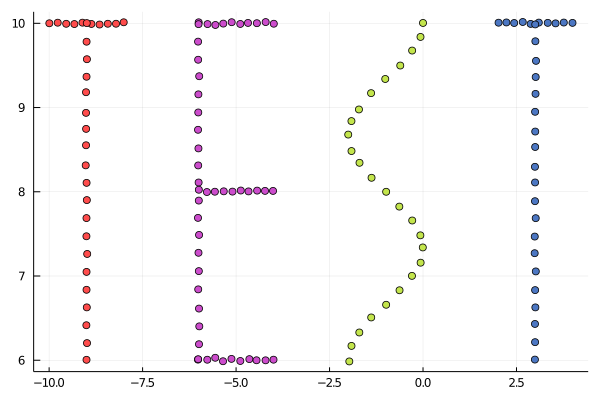

In [46]:
points = données(41, 0.01)
labels = Spectral_Clustering(points, 4, 0.2)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

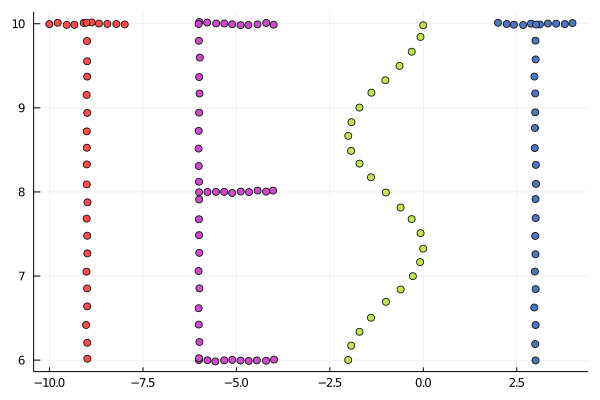

In [47]:
data = données(41, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(41, list_sigma)
labels = Spectral_Clustering_pvalue(points, 4, 4)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

## 8 Classes

### Huit pavés 

#### Gaussian Similarity function

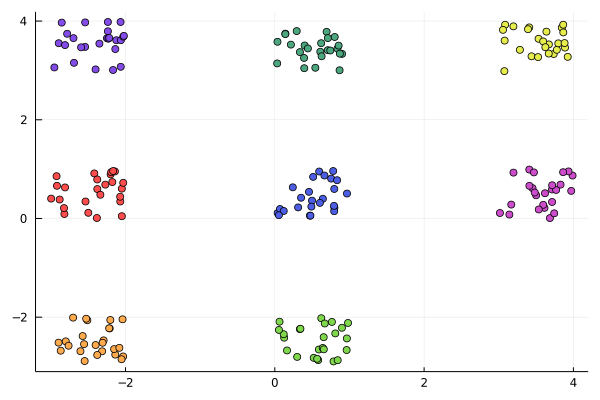

In [48]:
points = données(80, 0.01)
labels = Spectral_Clustering(points, 8, 0.3)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

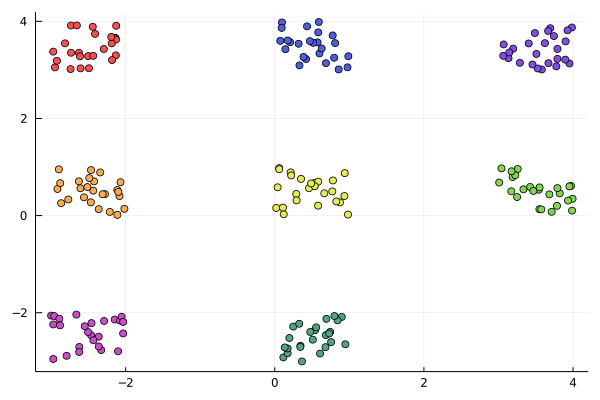

In [49]:
data = données(80, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(80, list_sigma)
labels = Spectral_Clustering_pvalue(points, 8, 7)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### Huit classes

#### Gaussian Similarity function

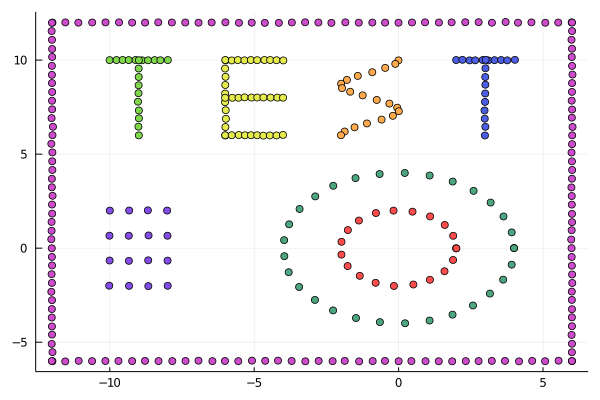

In [50]:
points = données(81, 0.01)
labels = Spectral_Clustering(points, 8, 0.3)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

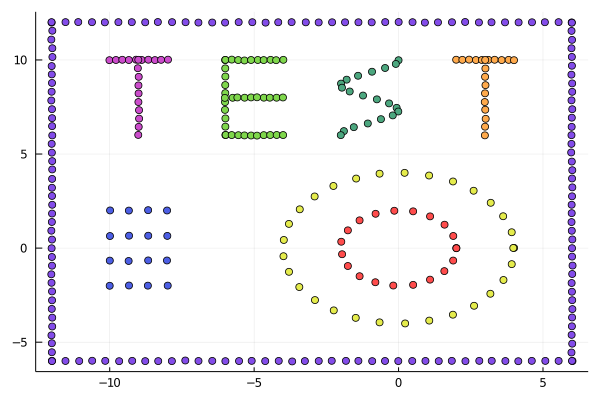

In [51]:
data = données(81, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(81, list_sigma)
labels = Spectral_Clustering_pvalue(points, 8, 10)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

### Huit classes de différente densité

#### Gaussian Similarity function

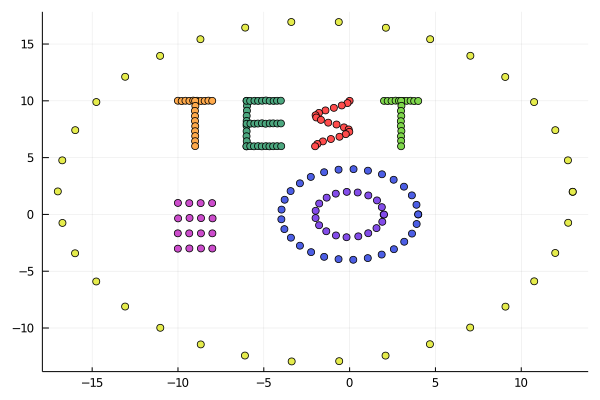

In [53]:
points = données(82, 0.01)
labels = Spectral_Clustering(points, 8, 0.3)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

#### p-value similarity function 

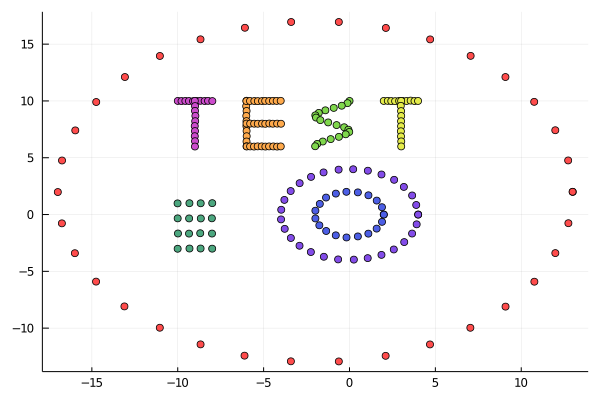

In [54]:
data = données(82, 0.01)
n = length(data)
list_sigma = [0.01 for _ in 1:n]
points = données_bl(82, list_sigma)
labels = Spectral_Clustering_pvalue(points, 8, 10)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

# Noisy Data

## p-value Similarity Function 

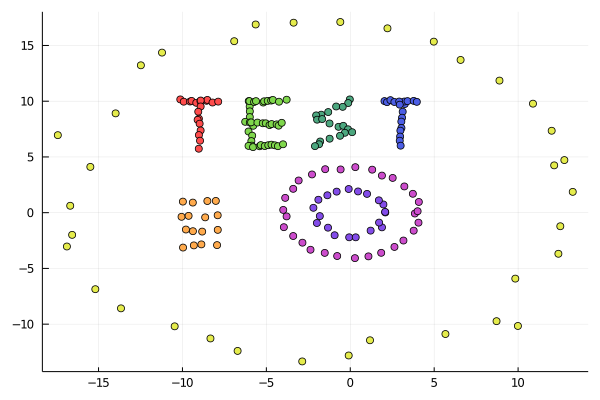

In [55]:
Random.seed!(1)
data = données(82, 0.01)
n = length(data)
list_sigma = vcat([0.1 for _ in 1:160], [0.2 for _ in 1:16], [0.7 for _ in 1:25])
points = données_bl(82, list_sigma)
labels = Spectral_Clustering_pvalue(points, 8, 7)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)

## Gaussian Similarity Function

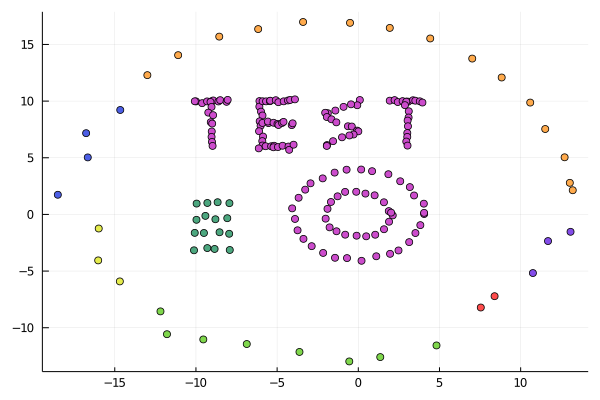

In [56]:
Random.seed!(2)
data = données(82, 0.01)
n = length(data)
list_sigma = vcat([0.1 for _ in 1:164], [0.2 for _ in 1:16], [0.7 for _ in 1:21])
points = données_bl(82, list_sigma)
labels = Spectral_Clustering(points, 8, 0.5)
x = [points[k][1][1] for k in 1:length(points)]
y = [points[k][1][2] for k in 1:length(points)]
scatter(x, y, marker_z=labels, color=:lightrainbow, legend=false)